# **House Price Prediction by Clustering Method**

In [0]:
import pandas as pd
import numpy as np

from google.colab import files

In [2]:
#Upload train data set file from local to colabs area
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
# Load Train dataset
train = pd.read_csv("train.csv")
train.head(5).append(train.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136

In [4]:
#Upload test data set file from local to colabs area
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
# Load Test dataset
test = pd.read_csv("test.csv")
test.head(5).append(test.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,

In [6]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [7]:
train['SalePrice'].min(), train['SalePrice'].max(), train['SalePrice'].mean()

(34900, 755000, 180921.19589041095)

In [8]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [0]:
#Create total data dataframe
total_data_df = pd.DataFrame()


In [0]:
train_house_price = ['SalePrice']

In [11]:
total_data_df = train.drop(train_house_price, axis=1)
total_data_df.head(2).append(total_data_df.tail(2))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [0]:
total_data_df = total_data_df.append(test)

In [13]:
total_data_df.shape

(2919, 80)

In [14]:
total_data_df.head(5).append(total_data_df.tail(5))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdB

In [0]:
total_data_dummies_df = pd.DataFrame()

In [0]:
get_dummy_columns = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Exterior1st', 'ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'Functional', 'PoolQC', 'SaleType', 'Utilities', 'BldgType', 'HouseStyle', 'RoofStyle', 'Heating', 'KitchenQual', 'GarageType', 'SaleCondition', 'Street', 'RoofMatl', 'BsmtCond']

In [0]:
for index in get_dummy_columns:
  total_data_df = pd.concat([total_data_df.drop(index, axis=1), pd.get_dummies(total_data_df[index], dummy_na=True, prefix=index)], axis=1) 
  total_data_df.shape

In [0]:
# Replace Numpy Nan values with 0 and 'nan'
for col in total_data_df.columns:
  if total_data_df[col].dtypes == object:
    total_data_df[col].fillna(value='nan', inplace=True)
  else:
    total_data_df[col].fillna(value=0, inplace=True)

In [19]:
total_data_df.head(5).append(total_data_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,Alley,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,...,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan
0,1,60,65.0,8450,nan,Norm,7,5,2003,2003,VinylSd,BrkFace,196.0,PConc,No,GLQ,706.0,Unf,0.0,150.0,856.0,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,nan,2003.0,RFn,2.0,548.0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,nan,Norm,6,8,1976,1976,MetalSd,None,0.0,CBlock,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,TA,1976.0,RFn,2.0,460.0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,nan,Norm,7,5,2001,2002,VinylSd,BrkFace,162.0,PConc,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,TA,2001.0,RFn,2.0,608.0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,nan,Norm,7,5,1915,1970,Wd Shng,None,0.0,BrkTil,No,ALQ,216.0,Unf,0.0,540.0,756.0,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,Gd,1998.0,Unf,3.0,642.0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,84.0,14260,nan,Norm,8,5,2000,2000,VinylSd,BrkFace,350.0,PConc,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,TA,2000.0,RFn,3.0,836.0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1454,2915,160,21.0,1936,nan,Norm,4,7,1970,1970,CmentBd,None,0.0,CBlock,No,Unf,0.0,Unf,0.0,546.0,546.0,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,nan,0.0,nan,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1455,2916,160,21.0,1894,nan,Norm,4,5,1970,1970,CmentBd,None,0.0,CBlock,No,Rec,252.0,Unf,0.0,294.0,546.0,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,nan,1970.0,Unf,1.0,286.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1456,2917,20,160.0,20000,nan,Norm,5,7,1960,1996,VinylSd,None,0.0,CBlock,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,TA,1960.0,Unf,2.0,576.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1457,2918,85,62.0,10441,nan,Norm,5,5,1992,1992,Wd Shng,None,0.0,PConc,Av,GLQ,337.0,Unf,0.0,575.0,912.0,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,6,0,nan,0.0,nan,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1458,2919,60,74.0,9627,nan,Norm,7,5,1993,1994,HdBoard,BrkFace,94.0,PConc,Av,LwQ,758.0,Unf,0.0,238.0,996.0,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,TA,1993.0,Fin,3.0,650.0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
drop_columns = ['Condition2', 'Alley', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature']

In [0]:
final_data_dummies_df = total_data_df.drop(drop_columns, axis=1)

In [22]:
final_data_dummies_df.head(5).append(final_data_dummies_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
final_data_dummies_df.shape

(2919, 226)

In [0]:
#pd.get_dummies(total_data_df['SaleCondition'], prefix='SaleCondition')
#total_data_dummies_df = pd.concat([total_data_dummies_df.drop('SaleCondition', axis=1), pd.get_dummies(total_data_dummies_df['SaleCondition'], dummy_na=True, prefix='SaleCondition')], axis=1)
#total_data_dummies_df.shape

# **Automatic binning methods**

In [0]:
from datetime import datetime
import itertools

In [26]:
final_data_bin_df = pd.DataFrame()
final_data_bin_df = final_data_dummies_df.copy()
final_data_bin_df.shape

(2919, 226)

In [0]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [0]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
  all_bins = []
  
  for method in bins_methods:
    start = datetime.now()
    hist, bin_edges = np.histogram(column_name,bins=method)
    all_bins.append(bin_edges)
    print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
  return all_bins

In [29]:
"""for method in bins_methods:
    start = datetime.now()
    hist, bin_edges = np.histogram(final_data_dummies_df.YearBuilt,bins=method)
    all_bins.append(bin_edges)
    print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1])) """

'for method in bins_methods:\n    start = datetime.now()\n    hist, bin_edges = np.histogram(final_data_dummies_df.YearBuilt,bins=method)\n    all_bins.append(bin_edges)\n    print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1])) '

In [0]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1) 

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# **Apply clustering to bins**

In [39]:
all_bins_year_built = []
all_bins_year_built = get_columns_bins(final_data_bin_df.YearBuilt)

Method : auto    - Running Time : 0:00:00.002528 - Number of bins : 22    - Head : [1872.         1878.57142857 1885.14285714] - Tail : [1996.85714286 2003.42857143]
Method : fd      - Running Time : 0:00:00.001688 - Number of bins : 22    - Head : [1872.         1878.57142857 1885.14285714] - Tail : [1996.85714286 2003.42857143]
Method : doane   - Running Time : 0:00:00.001777 - Number of bins : 18    - Head : [1872.         1880.11764706 1888.23529412] - Tail : [1993.76470588 2001.88235294]
Method : scott   - Running Time : 0:00:00.000555 - Number of bins : 20    - Head : [1872.         1879.26315789 1886.52631579] - Tail : [1995.47368421 2002.73684211]
Method : stone   - Running Time : 0:00:00.022996 - Number of bins : 98    - Head : [1872.         1873.42268041 1874.84536082] - Tail : [2007.15463918 2008.57731959]
Method : rice    - Running Time : 0:00:00.001334 - Number of bins : 30    - Head : [1872.         1876.75862069 1881.51724138] - Tail : [2000.48275862 2005.24137931]
Meth

array([1871.        , 1891.71428571, 1918.        , 1944.28571429,
       1970.57142857, 1990.28571429, 2011.        ])

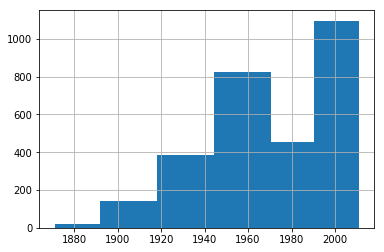

In [66]:
built_year_bin,label = get_clustering_bins(pd.Series(all_bins_year_built[0]), quantile=0.2, n_samples=10)
final_data_bin_df.YearBuilt.hist(bins=built_year_bin)
built_year_bin

In [67]:
len(built_year_bin) , final_data_bin_df.YearBuilt.value_counts(bins=built_year_bin)

(7, (1990.286, 2011.0]      1096
 (1944.286, 1970.571]     825
 (1970.571, 1990.286]     452
 (1918.0, 1944.286]       375
 (1891.714, 1918.0]       153
 (1870.999, 1891.714]      18
 Name: YearBuilt, dtype: int64)

In [68]:
final_data_bin_df['built_year_category'] = pd.cut(final_data_bin_df.YearBuilt, built_year_bin).cat.codes
final_data_bin_df.head(5).append(final_data_bin_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Heating_Wall,Heating_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,2
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1


In [69]:
final_data_bin_df.shape

(2919, 228)

In [70]:
all_bins_GrLivArea = []
all_bins_GrLivArea= get_columns_bins(final_data_bin_df.GrLivArea)

Method : auto    - Running Time : 0:00:00.003692 - Number of bins : 63    - Head : [334.         419.61290323 505.22580645] - Tail : [5470.77419355 5556.38709677]
Method : fd      - Running Time : 0:00:00.001857 - Number of bins : 63    - Head : [334.         419.61290323 505.22580645] - Tail : [5470.77419355 5556.38709677]
Method : doane   - Running Time : 0:00:00.002032 - Number of bins : 19    - Head : [334.         628.88888889 923.77777778] - Tail : [5052.22222222 5347.11111111]
Method : scott   - Running Time : 0:00:00.000771 - Number of bins : 44    - Head : [334.         457.44186047 580.88372093] - Tail : [5395.11627907 5518.55813953]
Method : stone   - Running Time : 0:00:00.023939 - Number of bins : 92    - Head : [334.         392.32967033 450.65934066] - Tail : [5525.34065934 5583.67032967]
Method : rice    - Running Time : 0:00:00.000509 - Number of bins : 30    - Head : [334.         517.03448276 700.06896552] - Tail : [5275.93103448 5458.96551724]
Method : sturges - Run

array([ 333.        , 1104.51612903, 2131.87096774, 3073.61290323,
       4100.96774194, 4957.09677419, 5643.        ])

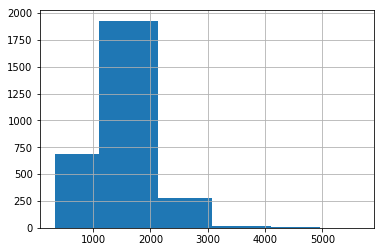

In [71]:
GrLivArea_bins,label_GrLivArea = get_clustering_bins(pd.Series(all_bins_GrLivArea[0]), quantile=0.2, n_samples=10)
final_data_bin_df.GrLivArea.hist(bins=GrLivArea_bins)
GrLivArea_bins

In [117]:
len(GrLivArea_bins) , final_data_bin_df.GrLivArea.value_counts(bins=GrLivArea_bins)

(7, (1104.516, 2131.871]    1929
 (332.999, 1104.516]      686
 (2131.871, 3073.613]     279
 (3073.613, 4100.968]      20
 (4100.968, 4957.097]       3
 (4957.097, 5643.0]         2
 Name: GrLivArea, dtype: int64)

In [118]:
final_data_bin_df['GriLivArea_category'] = pd.cut(final_data_bin_df.GrLivArea, GrLivArea_bins).cat.codes
final_data_bin_df.head(5).append(final_data_bin_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Heating_Wall,Heating_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,2
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1


In [119]:
final_data_bin_df.GrLivArea.min(), final_data_bin_df.GrLivArea.max(), final_data_bin_df.GrLivArea.mean(), GrLivArea_bins.min(), GrLivArea_bins.max(), GrLivArea_bins.mean()

(334, 5642, 1500.7598492634463, 333.0, 5643.0, 3049.152073732719)

In [120]:
final_data_bin_df.shape

(2919, 228)

In [121]:
all_bins_GarageArea = []
all_bins_GarageArea = get_columns_bins(final_data_bin_df.GarageArea)

Method : auto    - Running Time : 0:00:00.001646 - Number of bins : 43    - Head : [ 0.         35.42857143 70.85714286] - Tail : [1417.14285714 1452.57142857]
Method : fd      - Running Time : 0:00:00.001155 - Number of bins : 43    - Head : [ 0.         35.42857143 70.85714286] - Tail : [1417.14285714 1452.57142857]
Method : doane   - Running Time : 0:00:00.000949 - Number of bins : 17    - Head : [  0.  93. 186.] - Tail : [1302. 1395.]
Method : scott   - Running Time : 0:00:00.000532 - Number of bins : 30    - Head : [  0.          51.31034483 102.62068966] - Tail : [1385.37931034 1436.68965517]
Method : stone   - Running Time : 0:00:00.018980 - Number of bins : 101   - Head : [ 0.   14.88 29.76] - Tail : [1458.24 1473.12]
Method : rice    - Running Time : 0:00:00.000402 - Number of bins : 30    - Head : [  0.          51.31034483 102.62068966] - Tail : [1385.37931034 1436.68965517]
Method : sturges - Running Time : 0:00:00.000328 - Number of bins : 14    - Head : [  0.         114.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([-1.00000000e+00,  7.08571429e+01,  1.77142857e+02,  2.83428571e+02,
        3.89714286e+02,  4.60571429e+02,  5.31428571e+02,  6.37714286e+02,
        7.44000000e+02,  8.50285714e+02,  9.56571429e+02,  1.02742857e+03,
        1.09828571e+03,  1.20457143e+03,  1.31085714e+03,  1.38171429e+03,
        1.48900000e+03])

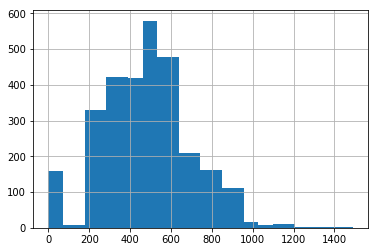

In [122]:
GarageArea_bins,label_GarageArea = get_clustering_bins(pd.Series(all_bins_GarageArea[0]), quantile=0.10, n_samples=22)
final_data_bin_df.GarageArea.hist(bins=GarageArea_bins)
GarageArea_bins

In [123]:
len(GarageArea_bins) , final_data_bin_df.GarageArea.value_counts(bins=GarageArea_bins)

(17, (460.571, 531.429]      579
 (531.429, 637.714]      477
 (283.429, 389.714]      421
 (389.714, 460.571]      420
 (177.143, 283.429]      330
 (637.714, 744.0]        211
 (744.0, 850.286]        161
 (-1.001, 70.857]        158
 (850.286, 956.571]      110
 (956.571, 1027.429]      16
 (1098.286, 1204.571]     10
 (1027.429, 1098.286]      9
 (70.857, 177.143]         8
 (1381.714, 1489.0]        3
 (1310.857, 1381.714]      3
 (1204.571, 1310.857]      3
 Name: GarageArea, dtype: int64)

In [0]:
final_data_bin_df.GarageArea.min(), final_data_bin_df.GarageArea.max(), final_data_bin_df.GarageArea.mean(), GarageArea_bins.min(), GarageArea_bins.max(), GarageArea_bins.mean()

In [0]:
"""GarageArea_bins = [0, 200, 250, 300, 350, 400, 450, 500, 550, 600, 700, 900, final_data_dummies_df.GarageArea.max() +1 ]
final_data_dummies_df.GarageArea.hist(bins=GarageArea_bins)"""

In [0]:
#len(GarageArea_bins) , final_data_dummies_df.GarageArea.value_counts(bins=GarageArea_bins)

In [125]:
final_data_bin_df['GarageArea_category'] = pd.cut(final_data_bin_df.GarageArea, GarageArea_bins).cat.codes
final_data_bin_df.head(5).append(final_data_bin_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,Heating_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,7
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,2,8
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,3
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1,6
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7


In [126]:
all_bins_ScreenPorch = []
all_bins_ScreenPorch = get_columns_bins(final_data_bin_df.ScreenPorch)

Method : auto    - Running Time : 0:00:00.007766 - Number of bins : 14    - Head : [ 0.         44.30769231 88.61538462] - Tail : [487.38461538 531.69230769]
Method : fd      - Running Time : 0:00:00.001409 - Number of bins : 2     - Head : [  0. 576.] - Tail : [0.]
Method : doane   - Running Time : 0:00:00.003530 - Number of bins : 20    - Head : [ 0.         30.31578947 60.63157895] - Tail : [515.36842105 545.68421053]
Method : scott   - Running Time : 0:00:00.000547 - Number of bins : 43    - Head : [ 0.         13.71428571 27.42857143] - Tail : [548.57142857 562.28571429]
Method : stone   - Running Time : 0:00:00.021478 - Number of bins : 101   - Head : [ 0.    5.76 11.52] - Tail : [564.48 570.24]
Method : rice    - Running Time : 0:00:00.000715 - Number of bins : 30    - Head : [ 0.         19.86206897 39.72413793] - Tail : [536.27586207 556.13793103]
Method : sturges - Running Time : 0:00:00.000632 - Number of bins : 14    - Head : [ 0.         44.30769231 88.61538462] - Tail : [

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/mean_shift_.py:291: UserWarning: Binning data failed with provided bin_size=44.307692, using data points as seeds.
  " using data points as seeds." % bin_size)


array([ -1.        ,   0.        ,  44.30769231, 132.92307692,
       177.23076923, 265.84615385, 310.15384615, 354.46153846,
       398.76923077, 531.69230769, 577.        ])

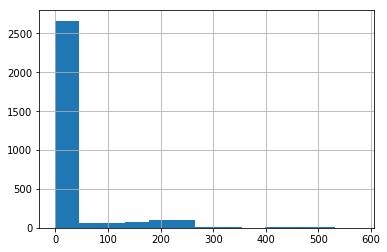

In [127]:
ScreenPorch_bins,label_ScreenPorch = get_clustering_bins(pd.Series(all_bins_ScreenPorch[0]), quantile=0.20, n_samples=20)
final_data_bin_df.ScreenPorch.hist(bins=ScreenPorch_bins)
ScreenPorch_bins

In [128]:
len(ScreenPorch_bins) , final_data_bin_df.ScreenPorch.value_counts(bins=ScreenPorch_bins)

(11, (-1.001, 0.0]         2663
 (177.231, 265.846]      94
 (132.923, 177.231]      78
 (44.308, 132.923]       57
 (265.846, 310.154]      13
 (310.154, 354.462]       5
 (398.769, 531.692]       4
 (354.462, 398.769]       3
 (531.692, 577.0]         1
 (0.0, 44.308]            1
 Name: ScreenPorch, dtype: int64)

In [129]:
final_data_bin_df.ScreenPorch.min(), final_data_bin_df.ScreenPorch.max(), final_data_bin_df.ScreenPorch.mean(),  ScreenPorch_bins.min(), ScreenPorch_bins.max(), ScreenPorch_bins.mean()

(0, 576, 16.062350119904078, -1.0, 577.0, 253.76223776223776)

In [130]:
"""ScreenPorch_bins = [0,1, 120, 150, 175, 250, final_data_dummies_df.ScreenPorch.max() +1 ]
final_data_dummies_df.ScreenPorch.hist(bins=ScreenPorch_bins)"""

'ScreenPorch_bins = [0,1, 120, 150, 175, 250, final_data_dummies_df.ScreenPorch.max() +1 ]\nfinal_data_dummies_df.ScreenPorch.hist(bins=ScreenPorch_bins)'

In [131]:
len(ScreenPorch_bins) , final_data_bin_df.ScreenPorch.value_counts(bins=ScreenPorch_bins)

(11, (-1.001, 0.0]         2663
 (177.231, 265.846]      94
 (132.923, 177.231]      78
 (44.308, 132.923]       57
 (265.846, 310.154]      13
 (310.154, 354.462]       5
 (398.769, 531.692]       4
 (354.462, 398.769]       3
 (531.692, 577.0]         1
 (0.0, 44.308]            1
 Name: ScreenPorch, dtype: int64)

In [132]:
final_data_bin_df['ScreenPorch_category'] = pd.cut(final_data_bin_df.ScreenPorch, ScreenPorch_bins).cat.codes
final_data_bin_df.head(5).append(final_data_bin_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,7,0
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,2,8,0
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,3,0
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1,6,0
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0


In [133]:
all_bins_MSSubClass = []
all_bins_MSSubClass = get_columns_bins(final_data_bin_df.MSSubClass)

Method : auto    - Running Time : 0:00:00.002411 - Number of bins : 26    - Head : [20.  26.8 33.6] - Tail : [176.4 183.2]
Method : fd      - Running Time : 0:00:00.000713 - Number of bins : 26    - Head : [20.  26.8 33.6] - Tail : [176.4 183.2]
Method : doane   - Running Time : 0:00:00.001292 - Number of bins : 19    - Head : [20.         29.44444444 38.88888889] - Tail : [171.11111111 180.55555556]
Method : scott   - Running Time : 0:00:00.002119 - Number of bins : 18    - Head : [20. 30. 40.] - Tail : [170. 180.]
Method : stone   - Running Time : 0:00:00.024559 - Number of bins : 101   - Head : [20.  21.7 23.4] - Tail : [186.6 188.3]
Method : rice    - Running Time : 0:00:00.000459 - Number of bins : 30    - Head : [20.         25.86206897 31.72413793] - Tail : [178.27586207 184.13793103]
Method : sturges - Running Time : 0:00:00.000380 - Number of bins : 14    - Head : [20.         33.07692308 46.15384615] - Tail : [163.84615385 176.92307692]
Method : sqrt    - Running Time : 0:00:

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([ 19. ,  47.2,  81.2, 115.2, 156. , 191. ])

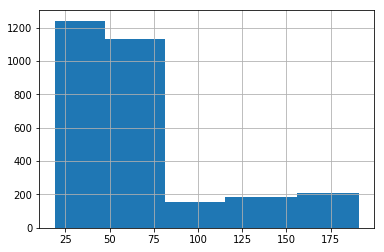

In [134]:
MSSubClass_bins,label_MSSubClass = get_clustering_bins(pd.Series(all_bins_MSSubClass[0]), quantile=0.20, n_samples=20)
final_data_bin_df.MSSubClass.hist(bins=MSSubClass_bins)
MSSubClass_bins

In [135]:
final_data_bin_df.MSSubClass.min(), final_data_bin_df.MSSubClass.max(), final_data_bin_df.MSSubClass.mean()

(20, 190, 57.1377183967112)

In [136]:
"""MSSubClass_bins = [0, 20, 40, 55, 60, 90, 130, final_data_dummies_df.MSSubClass.max() +1 ]
final_data_dummies_df.MSSubClass.hist(bins=MSSubClass_bins)"""

'MSSubClass_bins = [0, 20, 40, 55, 60, 90, 130, final_data_dummies_df.MSSubClass.max() +1 ]\nfinal_data_dummies_df.MSSubClass.hist(bins=MSSubClass_bins)'

In [137]:
len(MSSubClass_bins) , final_data_bin_df.MSSubClass.value_counts(bins=MSSubClass_bins)

(6, (18.999, 47.2]    1242
 (47.2, 81.2]      1131
 (156.0, 191.0]     206
 (115.2, 156.0]     183
 (81.2, 115.2]      157
 Name: MSSubClass, dtype: int64)

In [138]:
final_data_bin_df.shape

(2919, 230)

In [139]:
final_data_bin_df['MSSubClass_category'] = pd.cut(final_data_bin_df.MSSubClass, MSSubClass_bins).cat.codes
final_data_bin_df.head(5).append(final_data_bin_df.tail(5))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0
2,3,60,68.0,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1
3,4,70,60.0,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,7,0,1
4,5,60,84.0,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,2,8,0,1
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,4
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,3,0,4
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,1,6,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1


In [140]:
final_data_bin_df.shape

(2919, 231)

In [141]:
all_bins_LotFrontage = []
all_bins_LotFrontage = get_columns_bins(final_data_bin_df.LotFrontage)

Method : auto    - Running Time : 0:00:00.002353 - Number of bins : 65    - Head : [0.       4.890625 9.78125 ] - Tail : [303.21875  308.109375]
Method : fd      - Running Time : 0:00:00.001958 - Number of bins : 65    - Head : [0.       4.890625 9.78125 ] - Tail : [303.21875  308.109375]
Method : doane   - Running Time : 0:00:00.001234 - Number of bins : 15    - Head : [ 0.         22.35714286 44.71428571] - Tail : [268.28571429 290.64285714]
Method : scott   - Running Time : 0:00:00.000546 - Number of bins : 40    - Head : [ 0.          8.02564103 16.05128205] - Tail : [296.94871795 304.97435897]
Method : stone   - Running Time : 0:00:00.019264 - Number of bins : 95    - Head : [0.         3.32978723 6.65957447] - Tail : [306.34042553 309.67021277]
Method : rice    - Running Time : 0:00:00.000430 - Number of bins : 30    - Head : [ 0.         10.79310345 21.5862069 ] - Tail : [291.4137931  302.20689655]
Method : sturges - Running Time : 0:00:00.000321 - Number of bins : 14    - Head 

array([ -1.      ,  39.125   ,  68.46875 ,  97.8125  , 127.15625 ,
       180.953125, 239.640625, 268.984375, 314.      ])

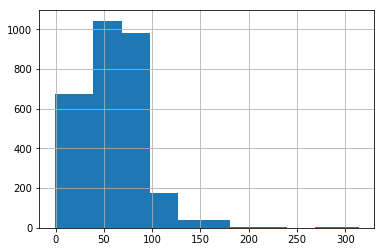

In [142]:
LotFrontage_bins,label_LotFrontage = get_clustering_bins(pd.Series(all_bins_LotFrontage[0]), quantile=0.20, n_samples=20)
final_data_bin_df.LotFrontage.hist(bins=LotFrontage_bins)
LotFrontage_bins

In [143]:
final_data_bin_df.LotFrontage.min(), final_data_bin_df.LotFrontage.max(), final_data_bin_df.LotFrontage.mean()

(0.0, 313.0, 57.76670092497431)

In [144]:
"""LotFrontage_bins = [0, 20, 40, 55, 60, final_data_dummies_df.LotFrontage.max() +1 ]
final_data_dummies_df.LotFrontage.hist(bins=LotFrontage_bins)"""

'LotFrontage_bins = [0, 20, 40, 55, 60, final_data_dummies_df.LotFrontage.max() +1 ]\nfinal_data_dummies_df.LotFrontage.hist(bins=LotFrontage_bins)'

In [145]:
len(LotFrontage_bins) , final_data_bin_df.LotFrontage.value_counts(bins=LotFrontage_bins)

(9, (39.125, 68.469]      1044
 (68.469, 97.812]       984
 (-1.001, 39.125]       674
 (97.812, 127.156]      174
 (127.156, 180.953]      38
 (180.953, 239.641]       3
 (268.984, 314.0]         2
 (239.641, 268.984]       0
 Name: LotFrontage, dtype: int64)

In [146]:
final_data_bin_df['LotFrontage_category'] = pd.cut(final_data_bin_df.LotFrontage, LotFrontage_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2


In [147]:
final_data_bin_df.shape, final_data_bin_df.Id.nunique()

((2919, 232), 2919)

In [148]:
all_bins_LotArea = []
all_bins_LotArea = get_columns_bins(final_data_bin_df.LotArea)

Method : auto    - Running Time : 0:00:00.001978 - Number of bins : 375   - Head : [1300.         1872.04545455 2444.09090909] - Tail : [214100.90909091 214672.95454545]
Method : fd      - Running Time : 0:00:00.002200 - Number of bins : 375   - Head : [1300.         1872.04545455 2444.09090909] - Tail : [214100.90909091 214672.95454545]
Method : doane   - Running Time : 0:00:00.001638 - Number of bins : 22    - Head : [ 1300.         11487.85714286 21675.71428571] - Tail : [194869.28571429 205057.14285714]
Method : scott   - Running Time : 0:00:00.000917 - Number of bins : 113   - Head : [1300.         3210.22321429 5120.44642857] - Tail : [211424.55357143 213334.77678571]
Method : stone   - Running Time : 0:00:00.022461 - Number of bins : 97    - Head : [1300.      3528.59375 5757.1875 ] - Tail : [210787.8125  213016.40625]
Method : rice    - Running Time : 0:00:00.000507 - Number of bins : 30    - Head : [ 1300.          8677.4137931  16054.82758621] - Tail : [200490.17241379 207867

array([  1299.        ,  69373.40909091, 104268.18181818, 151175.90909091,
       215246.        ])

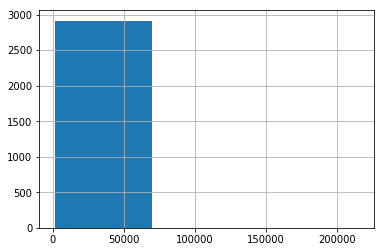

In [149]:
LotArea_bins,label_LotArea = get_clustering_bins(pd.Series(all_bins_LotArea[0]), quantile=0.20)
final_data_bin_df.LotArea.hist(bins=LotArea_bins)
LotArea_bins

In [150]:
len(LotArea_bins) , final_data_bin_df.LotArea.value_counts(bins=LotArea_bins)

(5, (1298.999, 69373.409]       2914
 (151175.909, 215246.0]         3
 (104268.182, 151175.909]       1
 (69373.409, 104268.182]        1
 Name: LotArea, dtype: int64)

In [151]:
final_data_bin_df.LotArea.value_counts().head()

9600     44
7200     43
6000     34
9000     29
10800    25
Name: LotArea, dtype: int64

In [152]:
final_data_bin_df.LotArea.min(), final_data_bin_df.LotArea.max(), LotArea_bins.min(), LotArea_bins.max()

(1300, 215245, 1299.0, 215246.0)

In [153]:
final_data_bin_df.LotArea.min(), final_data_bin_df.LotArea.max(), final_data_bin_df.LotArea.mean()

(1300, 215245, 10168.11408016444)

In [154]:
"""LotArea_bins = [1300, 5000, 8000, 10000, 14000, final_data_dummies_df.LotArea.max() +1 ]
final_data_dummies_df.LotArea.hist(bins=LotArea_bins)"""

'LotArea_bins = [1300, 5000, 8000, 10000, 14000, final_data_dummies_df.LotArea.max() +1 ]\nfinal_data_dummies_df.LotArea.hist(bins=LotArea_bins)'

In [155]:
len(LotArea_bins) , final_data_bin_df.LotArea.value_counts(bins=LotArea_bins)

(5, (1298.999, 69373.409]       2914
 (151175.909, 215246.0]         3
 (104268.182, 151175.909]       1
 (69373.409, 104268.182]        1
 Name: LotArea, dtype: int64)

In [156]:
final_data_bin_df['LotArea_category'] = pd.cut(final_data_bin_df.LotArea, LotArea_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category
0,1,60,65.0,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0
1,2,20,80.0,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0
1458,2919,60,74.0,9627,7,5,1993,1994,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0


In [0]:
drop_columns_after_bins = ['YearBuilt', 'LotArea', 'LotFrontage', 'MSSubClass', 'ScreenPorch', 'GarageArea', 'GrLivArea']

In [157]:
final_data_bin_df.shape

(2919, 233)

In [158]:
final_data_bin_df = final_data_bin_df.drop(drop_columns_after_bins, axis=1)
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,KitchenQual_TA,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0


In [159]:
final_data_bin_df.shape

(2919, 226)

Method : auto    - Running Time : 0:00:00.001998 - Number of bins : 34    - Head : [1.         1.27272727 1.54545455] - Tail : [9.45454545 9.72727273]
Method : fd      - Running Time : 0:00:00.000895 - Number of bins : 34    - Head : [1.         1.27272727 1.54545455] - Tail : [9.45454545 9.72727273]
Method : doane   - Running Time : 0:00:00.001904 - Number of bins : 16    - Head : [1.  1.6 2.2] - Tail : [8.8 9.4]
Method : scott   - Running Time : 0:00:00.000425 - Number of bins : 28    - Head : [1.         1.33333333 1.66666667] - Tail : [9.33333333 9.66666667]
Method : stone   - Running Time : 0:00:00.019142 - Number of bins : 101   - Head : [1.   1.09 1.18] - Tail : [9.82 9.91]
Method : rice    - Running Time : 0:00:00.000425 - Number of bins : 30    - Head : [1.         1.31034483 1.62068966] - Tail : [9.37931034 9.68965517]
Method : sturges - Running Time : 0:00:00.000377 - Number of bins : 14    - Head : [1.         1.69230769 2.38461538] - Tail : [8.61538462 9.30769231]
Method :

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([ 0.        ,  2.36363636,  4.27272727,  5.90909091,  7.54545455,
       11.        ])

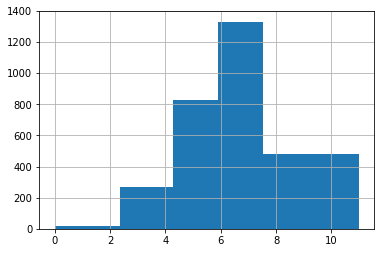

In [160]:
all_bins_OverallQual = []
all_bins_OverallQual = get_columns_bins(final_data_bin_df.OverallQual)
OverallQual_bins,label_OverallQual = get_clustering_bins(pd.Series(all_bins_OverallQual[0]), quantile=0.20)
final_data_bin_df.OverallQual.hist(bins=OverallQual_bins)
OverallQual_bins


In [161]:
len(OverallQual_bins) , final_data_bin_df.OverallQual.value_counts(bins=OverallQual_bins)
final_data_bin_df.OverallQual.value_counts().head()
final_data_bin_df['OverallQual_category'] = pd.cut(final_data_bin_df.OverallQual, OverallQual_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,KitchenQual_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3


Method : auto    - Running Time : 0:00:00.001945 - Number of bins : 59    - Head : [1.         1.13793103 1.27586207] - Tail : [8.72413793 8.86206897]
Method : fd      - Running Time : 0:00:00.001657 - Number of bins : 59    - Head : [1.         1.13793103 1.27586207] - Tail : [8.72413793 8.86206897]
Method : doane   - Running Time : 0:00:00.001044 - Number of bins : 18    - Head : [1.         1.47058824 1.94117647] - Tail : [8.05882353 8.52941176]
Method : scott   - Running Time : 0:00:00.001020 - Number of bins : 31    - Head : [1.         1.26666667 1.53333333] - Tail : [8.46666667 8.73333333]
Method : stone   - Running Time : 0:00:00.020801 - Number of bins : 101   - Head : [1.   1.08 1.16] - Tail : [8.84 8.92]
Method : rice    - Running Time : 0:00:00.000491 - Number of bins : 30    - Head : [1.         1.27586207 1.55172414] - Tail : [8.44827586 8.72413793]
Method : sturges - Running Time : 0:00:00.000380 - Number of bins : 14    - Head : [1.         1.61538462 2.23076923] - Tail

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([ 0.        ,  2.93103448,  4.44827586,  5.96551724,  7.48275862,
       10.        ])

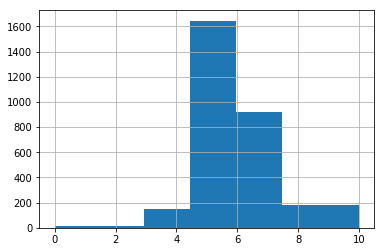

In [162]:
all_bins_OverallCond = []
all_bins_OverallCond = get_columns_bins(final_data_bin_df.OverallCond)
OverallCond_bins,label_OverallCond = get_clustering_bins(pd.Series(all_bins_OverallCond[0]), quantile=0.20)
final_data_bin_df.OverallCond.hist(bins=OverallCond_bins)
OverallCond_bins


In [163]:
len(OverallCond_bins) , final_data_bin_df.OverallCond.value_counts(bins=OverallCond_bins)
final_data_bin_df.OverallCond.value_counts().head()
final_data_bin_df['OverallCond_category'] = pd.cut(final_data_bin_df.OverallCond, OverallCond_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2


Method : auto    - Running Time : 0:00:00.002386 - Number of bins : 14    - Head : [1950.         1954.61538462 1959.23076923] - Tail : [2000.76923077 2005.38461538]
Method : fd      - Running Time : 0:00:00.001058 - Number of bins : 12    - Head : [1950.         1955.45454545 1960.90909091] - Tail : [1999.09090909 2004.54545455]
Method : doane   - Running Time : 0:00:00.001247 - Number of bins : 17    - Head : [1950.   1953.75 1957.5 ] - Tail : [2002.5  2006.25]
Method : scott   - Running Time : 0:00:00.000685 - Number of bins : 13    - Head : [1950. 1955. 1960.] - Tail : [2000. 2005.]
Method : stone   - Running Time : 0:00:00.030004 - Number of bins : 101   - Head : [1950.  1950.6 1951.2] - Tail : [2008.8 2009.4]
Method : rice    - Running Time : 0:00:00.000637 - Number of bins : 30    - Head : [1950.         1952.06896552 1954.13793103] - Tail : [2005.86206897 2007.93103448]
Method : sturges - Running Time : 0:00:00.000567 - Number of bins : 14    - Head : [1950.         1954.615384

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/mean_shift_.py:291: UserWarning: Binning data failed with provided bin_size=4.615385, using data points as seeds.
  " using data points as seeds." % bin_size)


array([1949.        , 1954.61538462, 1963.84615385, 1977.69230769,
       1991.53846154, 2000.76923077, 2011.        ])

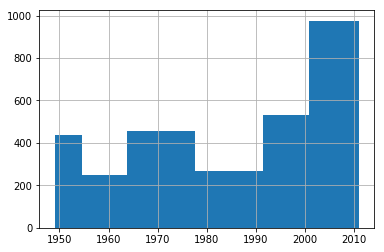

In [164]:
all_bins_YearRemodAdd = []
all_bins_YearRemodAdd = get_columns_bins(final_data_bin_df.YearRemodAdd)
YearRemodAdd_bins,label_YearRemodAdd = get_clustering_bins(pd.Series(all_bins_YearRemodAdd[0]), quantile=0.20)
final_data_bin_df.YearRemodAdd.hist(bins=YearRemodAdd_bins)
YearRemodAdd_bins


In [165]:
len(YearRemodAdd_bins) , final_data_bin_df.YearRemodAdd.value_counts(bins=YearRemodAdd_bins)
final_data_bin_df.YearRemodAdd.value_counts().head()
final_data_bin_df['YearRemodAdd_category'] = pd.cut(final_data_bin_df.YearRemodAdd, YearRemodAdd_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4


In [167]:
all_bins_BsmtFinSF1 = []
all_bins_BsmtFinSF1 = get_columns_bins(final_data_bin_df.BsmtFinSF1)


Method : auto    - Running Time : 0:00:00.002190 - Number of bins : 57    - Head : [  0.         100.78571429 201.57142857] - Tail : [5442.42857143 5543.21428571]
Method : fd      - Running Time : 0:00:00.000570 - Number of bins : 57    - Head : [  0.         100.78571429 201.57142857] - Tail : [5442.42857143 5543.21428571]
Method : doane   - Running Time : 0:00:00.001305 - Number of bins : 19    - Head : [  0.         313.55555556 627.11111111] - Tail : [5016.88888889 5330.44444444]
Method : scott   - Running Time : 0:00:00.001486 - Number of bins : 52    - Head : [  0.         110.66666667 221.33333333] - Tail : [5422.66666667 5533.33333333]
Method : stone   - Running Time : 0:00:00.025747 - Number of bins : 101   - Head : [  0.    56.44 112.88] - Tail : [5531.12 5587.56]
Method : rice    - Running Time : 0:00:00.000801 - Number of bins : 30    - Head : [  0.         194.62068966 389.24137931] - Tail : [5254.75862069 5449.37931034]
Method : sturges - Running Time : 0:00:00.000723 - N

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([-1.00000000e+00,  7.05500000e+02,  1.61257143e+03,  2.72121429e+03,
        3.82985714e+03,  4.73692857e+03,  5.64500000e+03])

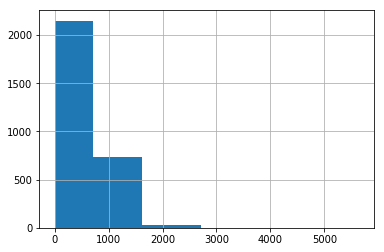

In [168]:
BsmtFinSF1_bins,label_BsmtFinSF1 = get_clustering_bins(pd.Series(all_bins_BsmtFinSF1[0]), quantile=0.20)
final_data_bin_df.BsmtFinSF1.hist(bins=BsmtFinSF1_bins)
BsmtFinSF1_bins

In [0]:
len(YearRemodAdd_bins) , final_data_bin_df.YearRemodAdd.value_counts(bins=YearRemodAdd_bins)

In [169]:
final_data_bin_df.BsmtFinSF1.value_counts().head()
final_data_bin_df['BsmtFinSF1_category'] = pd.cut(final_data_bin_df.BsmtFinSF1, BsmtFinSF1_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1


Method : auto    - Running Time : 0:00:00.002408 - Number of bins : 30    - Head : [  0.          80.55172414 161.10344828] - Tail : [2174.89655172 2255.44827586]
Method : fd      - Running Time : 0:00:00.001346 - Number of bins : 30    - Head : [  0.          80.55172414 161.10344828] - Tail : [2174.89655172 2255.44827586]
Method : doane   - Running Time : 0:00:00.001531 - Number of bins : 18    - Head : [  0.         137.41176471 274.82352941] - Tail : [2061.17647059 2198.58823529]
Method : scott   - Running Time : 0:00:00.000832 - Number of bins : 23    - Head : [  0.         106.18181818 212.36363636] - Tail : [2123.63636364 2229.81818182]
Method : stone   - Running Time : 0:00:00.024717 - Number of bins : 101   - Head : [ 0.   23.36 46.72] - Tail : [2289.28 2312.64]
Method : rice    - Running Time : 0:00:00.000402 - Number of bins : 30    - Head : [  0.          80.55172414 161.10344828] - Tail : [2174.89655172 2255.44827586]
Method : sturges - Running Time : 0:00:00.000715 - Numb

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


array([-1.00000000e+00,  3.22206897e+02,  7.24965517e+02,  1.20827586e+03,
        1.61103448e+03,  1.93324138e+03,  2.33700000e+03])

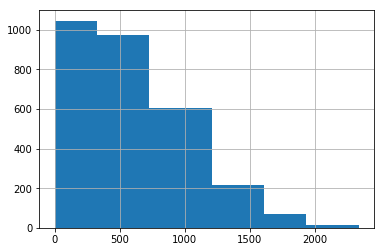

In [170]:
all_bins_BsmtUnfSF = []
all_bins_BsmtUnfSF = get_columns_bins(final_data_bin_df.BsmtUnfSF)
BsmtUnfSF_bins,label_BsmtUnfSF = get_clustering_bins(pd.Series(all_bins_BsmtUnfSF[0]), quantile=0.20)
final_data_bin_df.BsmtUnfSF.hist(bins=BsmtUnfSF_bins)
BsmtUnfSF_bins


In [171]:
len(BsmtUnfSF_bins) , final_data_bin_df.BsmtUnfSF.value_counts(bins=BsmtUnfSF_bins)
final_data_bin_df.BsmtUnfSF.value_counts().head()
final_data_bin_df['BsmtUnfSF_category'] = pd.cut(final_data_bin_df.BsmtUnfSF, BsmtUnfSF_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0


Method : auto    - Running Time : 0:00:00.002107 - Number of bins : 87    - Head : [  0.          71.04651163 142.09302326] - Tail : [5967.90697674 6038.95348837]
Method : fd      - Running Time : 0:00:00.000632 - Number of bins : 87    - Head : [  0.          71.04651163 142.09302326] - Tail : [5967.90697674 6038.95348837]
Method : doane   - Running Time : 0:00:00.001214 - Number of bins : 19    - Head : [  0.         339.44444444 678.88888889] - Tail : [5431.11111111 5770.55555556]
Method : scott   - Running Time : 0:00:00.000724 - Number of bins : 58    - Head : [  0.         107.19298246 214.38596491] - Tail : [5895.61403509 6002.80701754]
Method : stone   - Running Time : 0:00:00.018896 - Number of bins : 95    - Head : [  0.  65. 130.] - Tail : [5980. 6045.]
Method : rice    - Running Time : 0:00:00.000943 - Number of bins : 30    - Head : [  0.         210.68965517 421.37931034] - Tail : [5688.62068966 5899.31034483]
Method : sturges - Running Time : 0:00:00.000729 - Number of b

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1


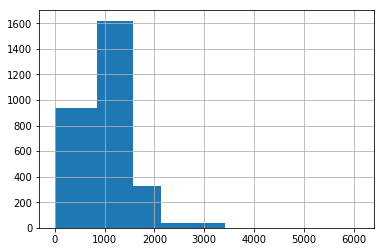

In [172]:
all_bins_TotalBsmtSF = []
all_bins_TotalBsmtSF = get_columns_bins(final_data_bin_df.TotalBsmtSF)
TotalBsmtSF_bins,label_TotalBsmtSF = get_clustering_bins(pd.Series(all_bins_TotalBsmtSF[0]), quantile=0.20)
final_data_bin_df.TotalBsmtSF.hist(bins=TotalBsmtSF_bins)
TotalBsmtSF_bins
len(TotalBsmtSF_bins) , final_data_bin_df.TotalBsmtSF.value_counts(bins=TotalBsmtSF_bins)
final_data_bin_df.TotalBsmtSF.value_counts().head()
final_data_bin_df['TotalBsmtSF_category'] = pd.cut(final_data_bin_df.TotalBsmtSF, TotalBsmtSF_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

In [180]:
final_data_bin_df = final_data_bin_df.rename(columns={"1stFlrSF": "firstFlrSF", "2ndFlrSF": "secondFlrSF"})
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,firstFlrSF,secondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_CarPort,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1


Method : auto    - Running Time : 0:00:00.001265 - Number of bins : 68    - Head : [334.         405.05970149 476.11940299] - Tail : [4952.88059701 5023.94029851]
Method : fd      - Running Time : 0:00:00.001572 - Number of bins : 68    - Head : [334.         405.05970149 476.11940299] - Tail : [4952.88059701 5023.94029851]
Method : doane   - Running Time : 0:00:00.000956 - Number of bins : 19    - Head : [334.  598.5 863. ] - Tail : [4566.  4830.5]
Method : scott   - Running Time : 0:00:00.000866 - Number of bins : 51    - Head : [334.   429.22 524.44] - Tail : [4904.56 4999.78]
Method : stone   - Running Time : 0:00:00.026260 - Number of bins : 69    - Head : [334.         404.01470588 474.02941176] - Tail : [4954.97058824 5024.98529412]
Method : rice    - Running Time : 0:00:00.000805 - Number of bins : 30    - Head : [334.         498.17241379 662.34482759] - Tail : [4766.65517241 4930.82758621]
Method : sturges - Running Time : 0:00:00.000664 - Number of bins : 14    - Head : [ 33

,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,firstFlrSF,secondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_Detchd,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0


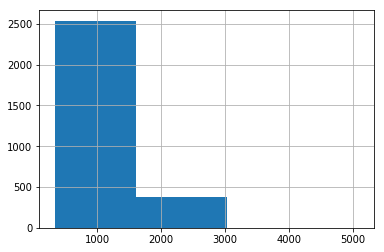

In [181]:
all_bins_firstFlrSF = []
all_bins_firstFlrSF = get_columns_bins(final_data_bin_df.firstFlrSF)
firstFlrSF_bins,label_firstFlrSF = get_clustering_bins(pd.Series(all_bins_firstFlrSF[0]), quantile=0.20)
final_data_bin_df.firstFlrSF.hist(bins=firstFlrSF_bins)
firstFlrSF_bins
len(firstFlrSF_bins) , final_data_bin_df.firstFlrSF.value_counts(bins=firstFlrSF_bins)
final_data_bin_df.firstFlrSF.value_counts().head()
final_data_bin_df['firstFlrSF_category'] = pd.cut(final_data_bin_df.firstFlrSF, firstFlrSF_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

Method : auto    - Running Time : 0:00:00.002793 - Number of bins : 22    - Head : [  0.          98.33333333 196.66666667] - Tail : [1868.33333333 1966.66666667]
Method : fd      - Running Time : 0:00:00.006113 - Number of bins : 22    - Head : [  0.          98.33333333 196.66666667] - Tail : [1868.33333333 1966.66666667]
Method : doane   - Running Time : 0:00:00.001188 - Number of bins : 18    - Head : [  0.         121.47058824 242.94117647] - Tail : [1822.05882353 1943.52941176]
Method : scott   - Running Time : 0:00:00.000508 - Number of bins : 21    - Head : [  0.   103.25 206.5 ] - Tail : [1858.5  1961.75]
Method : stone   - Running Time : 0:00:00.020393 - Number of bins : 101   - Head : [ 0.   20.65 41.3 ] - Tail : [2023.7  2044.35]
Method : rice    - Running Time : 0:00:00.000421 - Number of bins : 30    - Head : [  0.          71.20689655 142.4137931 ] - Tail : [1922.5862069  1993.79310345]
Method : sturges - Running Time : 0:00:00.000355 - Number of bins : 14    - Head : [ 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


,Id,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,firstFlrSF,secondFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,...,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category
0,1,7,5,2003,706.0,0.0,150.0,856.0,856,854,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2
1,2,6,8,1976,978.0,0.0,284.0,1262.0,1262,0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0
1457,2918,5,5,1992,337.0,0.0,575.0,912.0,970,0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0
1458,2919,7,5,1994,758.0,0.0,238.0,996.0,996,1004,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3


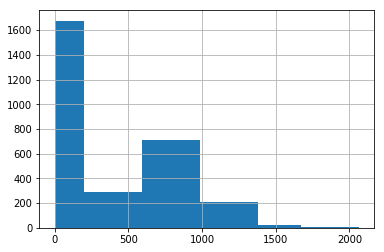

In [182]:
all_bins_secondFlrSF = []
all_bins_secondFlrSF = get_columns_bins(final_data_bin_df.secondFlrSF)
secondFlrSF_bins,label_secondFlrSF = get_clustering_bins(pd.Series(all_bins_secondFlrSF[0]), quantile=0.20)
final_data_bin_df.secondFlrSF.hist(bins=secondFlrSF_bins)
secondFlrSF_bins
len(secondFlrSF_bins) , final_data_bin_df.secondFlrSF.value_counts(bins=secondFlrSF_bins)
final_data_bin_df.secondFlrSF.value_counts().head()
final_data_bin_df['secondFlrSF_category'] = pd.cut(final_data_bin_df.secondFlrSF, secondFlrSF_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

In [0]:
drop2_columns_after_bins = ['secondFlrSF', 'firstFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'YearRemodAdd', 'OverallCond', 'OverallQual']

In [184]:
final_data_bin_df.shape

(2919, 234)

In [185]:
final_data_bin_df = final_data_bin_df.drop(drop2_columns_after_bins, axis=1)
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,GarageType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category
0,1,0.0,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2
1,2,0.0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0
1457,2918,0.0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0
1458,2919,0.0,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3


In [186]:
final_data_bin_df.shape

(2919, 226)

Method : auto    - Running Time : 0:00:00.001847 - Number of bins : 360   - Head : [ 0.          6.14763231 12.29526462] - Tail : [2194.70473538 2200.85236769]
Method : fd      - Running Time : 0:00:00.001153 - Number of bins : 360   - Head : [ 0.          6.14763231 12.29526462] - Tail : [2194.70473538 2200.85236769]
Method : doane   - Running Time : 0:00:00.001566 - Number of bins : 20    - Head : [  0.         116.15789474 232.31578947] - Tail : [1974.68421053 2090.84210526]
Method : scott   - Running Time : 0:00:00.002065 - Number of bins : 22    - Head : [  0.         105.0952381  210.19047619] - Tail : [1996.80952381 2101.9047619 ]
Method : stone   - Running Time : 0:00:00.021889 - Number of bins : 101   - Head : [ 0.   22.07 44.14] - Tail : [2162.86 2184.93]
Method : rice    - Running Time : 0:00:00.000417 - Number of bins : 30    - Head : [  0.          76.10344828 152.20689655] - Tail : [2054.79310345 2130.89655172]
Method : sturges - Running Time : 0:00:00.000348 - Number of 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


,Id,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category,GarageYrBlt_category
0,1,0.0,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2,5
1,2,0.0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0,5
1457,2918,0.0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0,0
1458,2919,0.0,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3,5


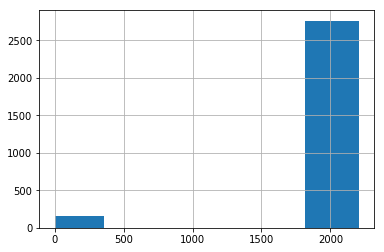

In [187]:

all_bins_GarageYrBlt = []
all_bins_GarageYrBlt = get_columns_bins(final_data_bin_df.GarageYrBlt)
GarageYrBlt_bins,label_GarageYrBlt = get_clustering_bins(pd.Series(all_bins_GarageYrBlt[0]), quantile=0.20)
final_data_bin_df.GarageYrBlt.hist(bins=GarageYrBlt_bins)
GarageYrBlt_bins
len(GarageYrBlt_bins) , final_data_bin_df.GarageYrBlt.value_counts(bins=GarageYrBlt_bins)
final_data_bin_df.GarageYrBlt.value_counts().head()
final_data_bin_df['GarageYrBlt_category'] = pd.cut(final_data_bin_df.GarageYrBlt, GarageYrBlt_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

Method : auto    - Running Time : 0:00:00.004818 - Number of bins : 62    - Head : [ 0.         23.3442623  46.68852459] - Tail : [1377.31147541 1400.6557377 ]
Method : fd      - Running Time : 0:00:00.002103 - Number of bins : 62    - Head : [ 0.         23.3442623  46.68852459] - Tail : [1377.31147541 1400.6557377 ]
Method : doane   - Running Time : 0:00:00.004254 - Number of bins : 19    - Head : [  0.          79.11111111 158.22222222] - Tail : [1265.77777778 1344.88888889]
Method : scott   - Running Time : 0:00:00.000484 - Number of bins : 48    - Head : [ 0.         30.29787234 60.59574468] - Tail : [1363.40425532 1393.70212766]
Method : stone   - Running Time : 0:00:00.022156 - Number of bins : 101   - Head : [ 0.   14.24 28.48] - Tail : [1395.52 1409.76]
Method : rice    - Running Time : 0:00:00.000464 - Number of bins : 30    - Head : [ 0.         49.10344828 98.20689655] - Tail : [1325.79310345 1374.89655172]
Method : sturges - Running Time : 0:00:00.000385 - Number of bins :

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


,Id,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category,GarageYrBlt_category,WoodDeckSF_category
0,1,0.0,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2,5,0
1,2,0.0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0,5,1
1457,2918,0.0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0,0,0
1458,2919,0.0,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3,5,0


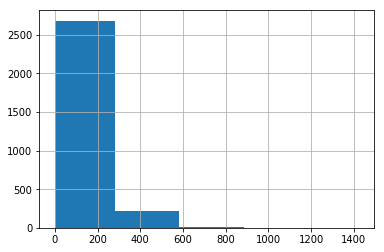

In [188]:
all_bins_WoodDeckSF = []
all_bins_WoodDeckSF = get_columns_bins(final_data_bin_df.WoodDeckSF)
WoodDeckSF_bins,label_WoodDeckSF = get_clustering_bins(pd.Series(all_bins_WoodDeckSF[0]), quantile=0.20)
final_data_bin_df.WoodDeckSF.hist(bins=WoodDeckSF_bins)
WoodDeckSF_bins
len(WoodDeckSF_bins) , final_data_bin_df.WoodDeckSF.value_counts(bins=WoodDeckSF_bins)
final_data_bin_df.WoodDeckSF.value_counts().head()
final_data_bin_df['WoodDeckSF_category'] = pd.cut(final_data_bin_df.WoodDeckSF, WoodDeckSF_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

Method : auto    - Running Time : 0:00:00.002012 - Number of bins : 16    - Head : [2006.         2006.26666667 2006.53333333] - Tail : [2009.46666667 2009.73333333]
Method : fd      - Running Time : 0:00:00.002307 - Number of bins : 16    - Head : [2006.         2006.26666667 2006.53333333] - Tail : [2009.46666667 2009.73333333]
Method : doane   - Running Time : 0:00:00.001217 - Number of bins : 16    - Head : [2006.         2006.26666667 2006.53333333] - Tail : [2009.46666667 2009.73333333]
Method : scott   - Running Time : 0:00:00.001989 - Number of bins : 14    - Head : [2006.         2006.30769231 2006.61538462] - Tail : [2009.38461538 2009.69230769]
Method : stone   - Running Time : 0:00:00.026870 - Number of bins : 101   - Head : [2006.   2006.04 2006.08] - Tail : [2009.92 2009.96]
Method : rice    - Running Time : 0:00:00.000728 - Number of bins : 30    - Head : [2006.         2006.13793103 2006.27586207] - Tail : [2009.72413793 2009.86206897]
Method : sturges - Running Time : 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:400: RuntimeWarning: The number of bins estimated may be suboptimal.
  width = _hist_bin_selectors[bin_name](a, (first_edge, last_edge))


,Id,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category,GarageYrBlt_category,WoodDeckSF_category,YrSold_category
0,1,0.0,0,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,0,61,0,0,0,0,2,2008,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2,5,0,3
1,2,0.0,0,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,298,0,0,0,0,0,5,2007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0,5,1,1
1457,2918,0.0,0,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,700,7,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0,0,0,0
1458,2919,0.0,0,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,190,48,0,0,0,0,11,2006,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3,5,0,0


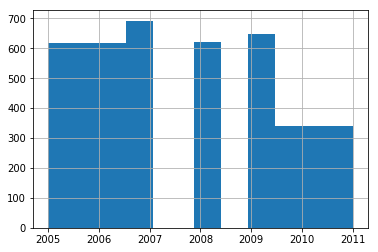

In [189]:
all_bins_YrSold = []
all_bins_YrSold = get_columns_bins(final_data_bin_df.YrSold)
YrSold_bins,label_YrSold = get_clustering_bins(pd.Series(all_bins_YrSold[0]), quantile=0.20)
final_data_bin_df.YrSold.hist(bins=YrSold_bins)
YrSold_bins
len(YrSold_bins) , final_data_bin_df.YrSold.value_counts(bins=YrSold_bins)
final_data_bin_df.YrSold.value_counts().head()
final_data_bin_df['YrSold_category'] = pd.cut(final_data_bin_df.YrSold, YrSold_bins).cat.codes
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

In [190]:
drop3_columns_after_bins = ['WoodDeckSF', 'GarageYrBlt', 'YrSold']
final_data_bin_df = final_data_bin_df.drop(drop3_columns_after_bins, axis=1)
final_data_bin_df.head(2).append(final_data_bin_df.tail(2))

,Id,BsmtFinSF2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,OpenPorchSF,EnclosedPorch,3SsnPorch,PoolArea,MiscVal,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,Street_Grvl,Street_Pave,Street_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,built_year_category,GriLivArea_category,GarageArea_category,ScreenPorch_category,MSSubClass_category,LotFrontage_category,LotArea_category,OverallQual_category,OverallCond_category,YearRemodAdd_category,BsmtFinSF1_category,BsmtUnfSF_category,TotalBsmtSF_category,firstFlrSF_category,secondFlrSF_category,GarageYrBlt_category,WoodDeckSF_category,YrSold_category
0,1,0.0,0,1.0,0.0,2,1,3,1,8,0,2.0,61,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,6,0,1,1,0,3,2,5,1,0,1,0,2,5,0,3
1,2,0.0,0,0.0,1.0,2,0,3,1,6,1,2.0,0,0,0,0,0,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,1,4,0,0,2,0,3,4,2,1,0,1,0,0,5,1,1
1457,2918,0.0,0,0.0,1.0,1,0,3,1,6,0,0.0,32,0,0,0,700,7,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,0,2,1,0,2,2,4,0,1,1,0,0,0,0,0
1458,2919,0.0,0,0.0,0.0,2,1,3,1,9,1,3.0,48,0,0,0,0,11,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5,1,7,0,1,2,0,3,2,4,1,0,1,0,3,5,0,0


In [0]:
#Export dataframe as a csv
final_data_bin_df.to_csv("preprocess.csv", index=True)